###Data Examination

In [1]:
import pandas as pd 
import gdown

gdown.download('https://drive.google.com/uc?id={}'.format('1wdbtj2s9Vst5EQll1oqc1qXx-_tTv7Cf'),'DCOILBRENTEU.csv',quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1wdbtj2s9Vst5EQll1oqc1qXx-_tTv7Cf
To: /content/DCOILBRENTEU.csv
100%|██████████| 143k/143k [00:00<00:00, 75.3MB/s]


'DCOILBRENTEU.csv'

In [2]:
!ls
!pwd

DCOILBRENTEU.csv  sample_data
/content


In [0]:
datam = pd.read_csv("DCOILBRENTEU.csv")

In [4]:
datam.head()

,DATE,DCOILBRENTEU
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [5]:
#datam.describe()
datam[datam.DCOILBRENTEU=='.']

,DATE,DCOILBRENTEU
18,1987-06-15,.
157,1987-12-25,.
162,1988-01-01,.
166,1988-01-07,.
179,1988-01-26,.
...,...,...
8245,2018-12-26,.
8248,2018-12-31,.
8249,2019-01-01,.
8327,2019-04-19,.


In [6]:
datam = datam[datam.DCOILBRENTEU != "."]
print(datam.shape)

(8156, 2)


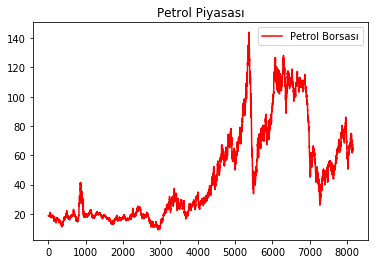

In [7]:
import matplotlib.pyplot as plt
datam = datam.iloc[:,1].values.astype(float)

plt.plot(datam,color='red',label = 'Petrol Borsası')
plt.title("Petrol Piyasası")
plt.legend()
plt.show()

### Data Preparation

In [8]:
import numpy as np
length = len(datam)
print(length)
length *= 1-0.1
print(length)


8156
7340.400000000001


In [0]:
batch_size = 64
epochs = 120
timesteps = 30

In [0]:
def get_train_length(dataset,batch_size,test_percent):
  length = len(dataset)
  length *= 1-test_percent 
  train_length_values = [] 

  for x in (range(int(length)- 100, int(length))):
    modulo = x%batch_size
    if(modulo==0):
      train_length_values.append(x)
      print(x)
  return(max(train_length_values))


def get_train_length_v2(dataset,batch_size,test_percent):
  length = len(dataset)
  length *= 1-test_percent
  
  howmanybatches = int(length/batch_size)
  my_train_length = howmanybatches* batch_size

  return my_train_length


In [11]:
length = get_train_length(datam,batch_size,0.1)
length_2 = get_train_length_v2(datam,batch_size,0.1)
print(length==length_2)

7296
True


In [0]:
upper_train = length + timesteps * 2
datam_train = datam[:upper_train]


In [14]:
datam_train = datam_train[:]
datam_train.shape


(7356,)

In [15]:
print(min(datam_train),max(datam_train))

9.1 143.95


In [16]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0,1))
trs = sc.fit_transform(np.float64(datam_train).reshape(-1,1))
trs.shape

print(min(trs),max(trs))

[0.] [1.]


In [17]:
xtr = []
ytr = []

#print(length+timesteps)

for i in range(timesteps,length+timesteps):
  xtr.append(trs[i-timesteps:i])
  ytr.append(trs[i:i+timesteps])


print(len(xtr))
print(len(ytr))

print(np.shape(xtr[0:2]))
print(np.shape(ytr[0:2]))

xtr = np.array(xtr)
ytr = np.array(ytr)


7296
7296
(2, 30, 1)
(2, 30, 1)


### Network

In [18]:
from keras.layers import Dense, Input, LSTM
from keras.models import Model
import h5py


Using TensorFlow backend.


In [19]:
input_1 = Input(batch_shape=(64,timesteps,1),name = 'input')
lstm1 = LSTM(8, stateful = False, return_sequences= True, name = 'lstm_1'  )(input_1)
lstm2 = LSTM(4, stateful = True, return_sequences= True, name = 'lstm_2'  )(lstm1)
output_1 = Dense(1,)(lstm2)

modelim = Model(inputs = input_1, outputs = output_1)

modelim.compile(optimizer = 'adam', loss = 'mae')
modelim.summary()





Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (64, 30, 1)               0         
_________________________________________________________________
lstm_1 (LSTM)                (64, 30, 8)               320       
_________________________________________________________________
lstm_2 (LSTM)                (64, 30, 4)               208       
_________________________________________________________________
dense_1 (Dense)              (64, 30, 1)               5         
Total params: 533
Trainable params: 533
Non-trainable params: 0
_________________________________________________________________


In [20]:
epochs = 100

for i in range(epochs):
  print('Epoch'+str(i))

  modelim.fit(xtr,ytr,shuffle=False,epochs=1,batch_size=64)
  modelim.reset_states()

Epoch0
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1





7296/7296 [==============================] - 18s 2ms/step - loss: 0.0550
Epoch1
Epoch 1/1
7296/7296 [==============================] - 8s 1ms/step - loss: 0.0579
Epoch2
Epoch 1/1
7296/7296 [==============================] - 8s 1ms/step - loss: 0.0552
Epoch3
Epoch 1/1
7296/7296 [==============================] - 8s 1ms/step - loss: 0.0558
Epoch4
Epoch 1/1
7296/7296 [==============================] - 8s 1ms/step - loss: 0.0553
Epoch5
Epoch 1/1
7296/7296 [==============================] - 8s 1ms/step - loss: 0.0549
Epoch6
Epoch 1/1
7296/7296 [==============================] - 8s 1ms/step - loss: 0.0541
Epoch7
Epoch 1/1
7296/7296 [==============================] - 8s 1ms/step - loss: 0.0532
Epoch8
Epoch 1/1
7296/7296 [==============================] - 8s 1ms/step - loss: 0.0522
Epoch9
Epoch 1/1
7296/7296 [==============================] - 8s 1ms/step - loss: 0.0509
Epoch10

KeyboardInterrupt: ignored

(7296, 30)


ValueError: ignored

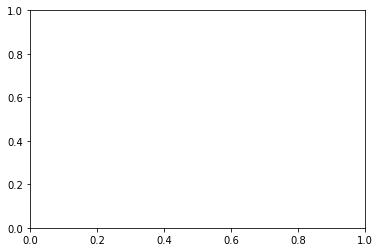

In [24]:
predicted = modelim.predict(xtr,batch_size = 64)
predicted = np.reshape(predicted,(predicted.shape[0],predicted.shape[1]))
print(predicted.shape)

predicted = sc.inverse_transform(predicted)

# for j in range(0,len(xtr)-timesteps):
#   predict 

predicted[0:len(ytr),0].astype(float)
plt.plot(ytr[0:len(ytr)].astype(float),color = 'red')
plt.plot(,color = 'blue')